PARTIE 1 : ANALYSE EN COMPOSANTES PRINCIPALES (ACP)

✅ Données chargées : 2350 observations, 17 variables

Aperçu des données :
   SITE  MEN03     DEP03  CARREF  HDAL  HDFR  HMSMAUT  INTERM  MONOPRIX  \
0     1   2513   9511281       0     0     0        0    2098         0   
1     2   3032  11629101       0     0     0        0    3938         0   
2     3   1104   4354977       0     0     0        0       0         0   
3     4   2401   9508016       0     0     0        0       0         0   
4     5    494   1800568       0     0     0        0       0         0   

   SYSTEM_U  CHAMPION  LECLERC  CASINO  GEANT  AUCHAN  ATAC  CORA  
0         0         0        0       0      0       0     0     0  
1         0         0        0       0      0       0     0     0  
2         0         0        0       0      0       0     0     0  
3         0         0        0       0      0       0     0     0  
4         0         0        0       0      0       0     0     0  

Variables ac

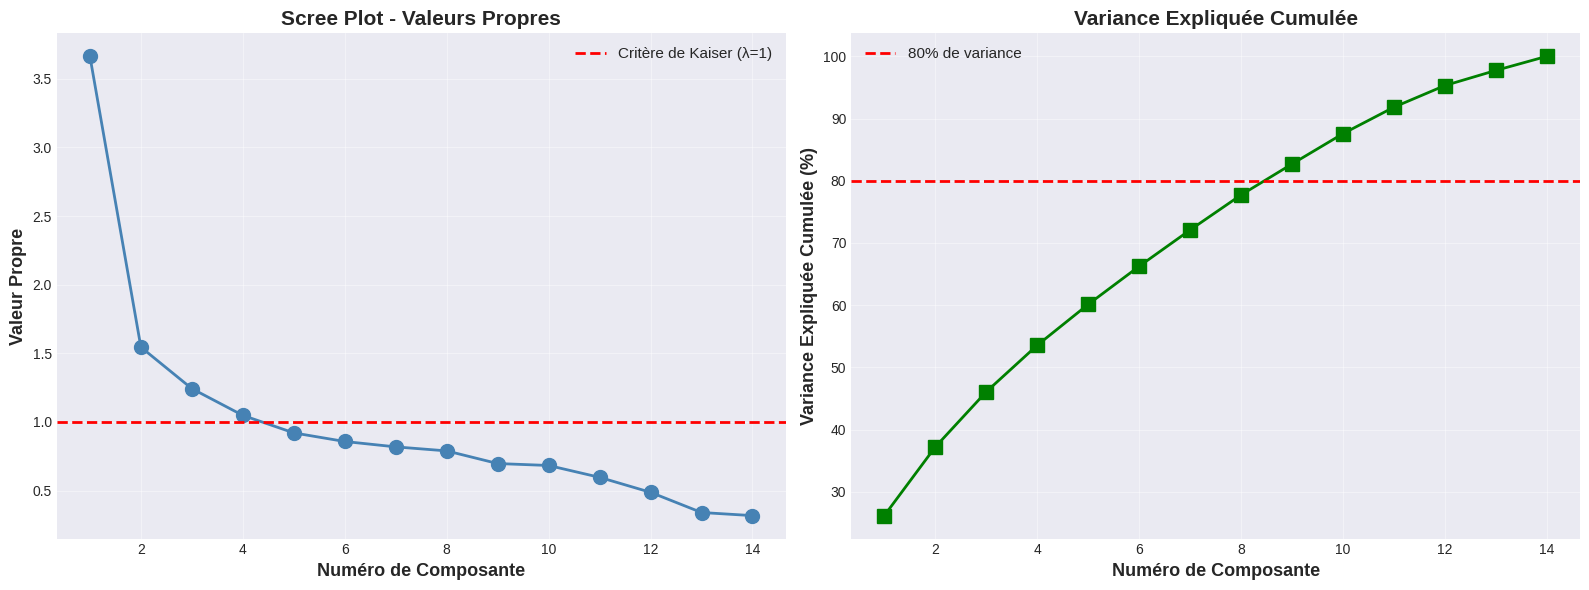

✅ Graphiques sauvegardés : scree_plot.png

CARACTÉRISATION DES COMPOSANTES PRINCIPALES

--------------------------------------------------------------------------------
CORRÉLATIONS VARIABLES-COMPOSANTES
--------------------------------------------------------------------------------
            PC1    PC2    PC3    PC4    PC5
CARREF    0.490 -0.139 -0.299 -0.080  0.355
HDAL      0.766 -0.213  0.306  0.029  0.079
HDFR      0.842  0.032 -0.079 -0.045 -0.034
HMSMAUT   0.483  0.623  0.155  0.177 -0.133
INTERM    0.587 -0.373 -0.033  0.086 -0.027
MONOPRIX  0.389  0.712 -0.187  0.118 -0.276
SYSTEM_U  0.234 -0.231 -0.096  0.675 -0.274
CHAMPION  0.515  0.051  0.146 -0.334 -0.436
LECLERC   0.557 -0.342  0.032  0.001 -0.131
CASINO    0.369  0.179 -0.571 -0.111  0.200
GEANT     0.508 -0.273 -0.391  0.056  0.013
AUCHAN    0.380 -0.066  0.333 -0.531 -0.069
ATAC      0.362  0.397  0.042 -0.027  0.494
CORA      0.317  0.053  0.608  0.348  0.347

------------------------------------------------------

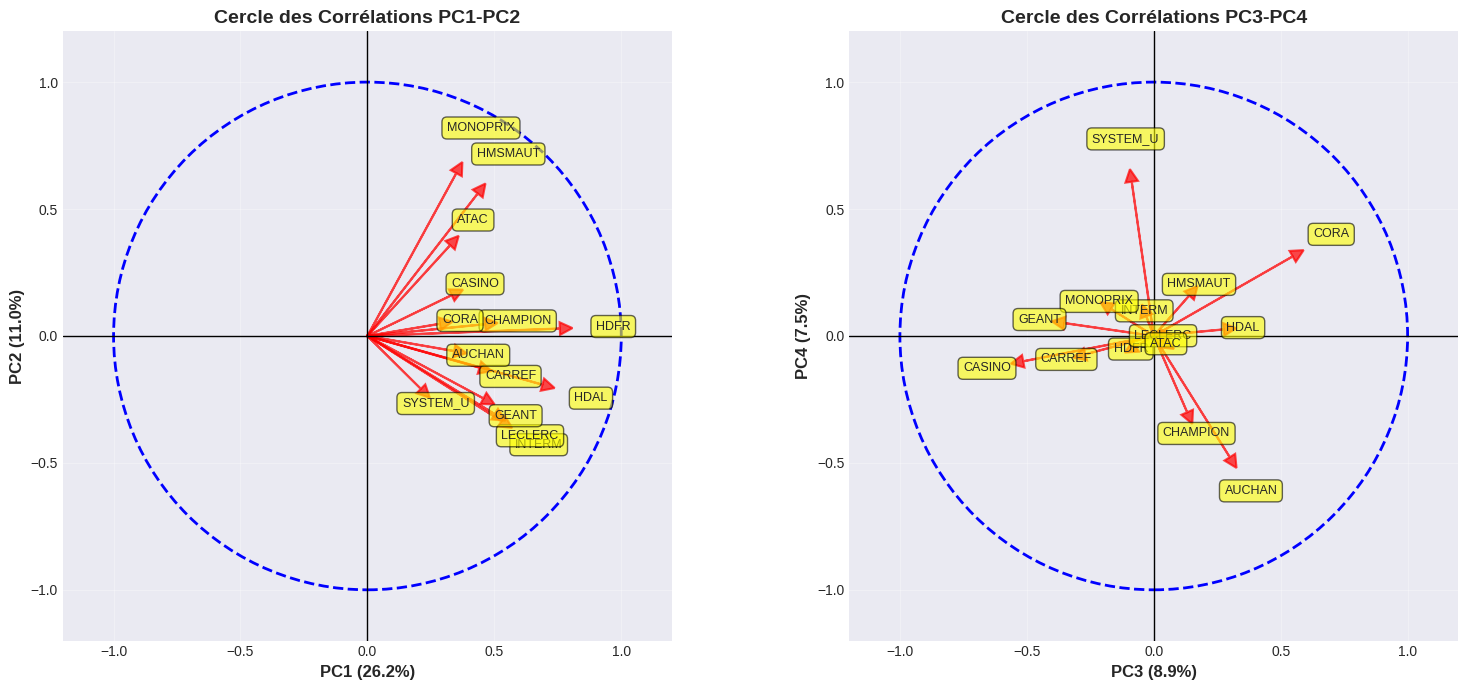

✅ Graphiques sauvegardés : correlation_circles.png

INTERPRÉTATION DES COMPOSANTES PRINCIPALES

════════════════════════════════════════════════════════════════════════════════
PC1 - Variance expliquée : 26.16%
════════════════════════════════════════════════════════════════════════════════

✅ Variables POSITIVEMENT corrélées (r > 0.5):
  • HDFR                           : r =  0.842, contribution =  70.91%
  • HDAL                           : r =  0.766, contribution =  58.64%
  • INTERM                         : r =  0.587, contribution =  34.42%
  • LECLERC                        : r =  0.557, contribution =  31.02%
  • CHAMPION                       : r =  0.515, contribution =  26.50%
  • GEANT                          : r =  0.508, contribution =  25.78%

🏆 Top 5 des variables les plus contributives:
  • HDFR                           : contribution =  70.91%, r =  0.842
  • HDAL                           : contribution =  58.64%, r =  0.766
  • INTERM                         : c

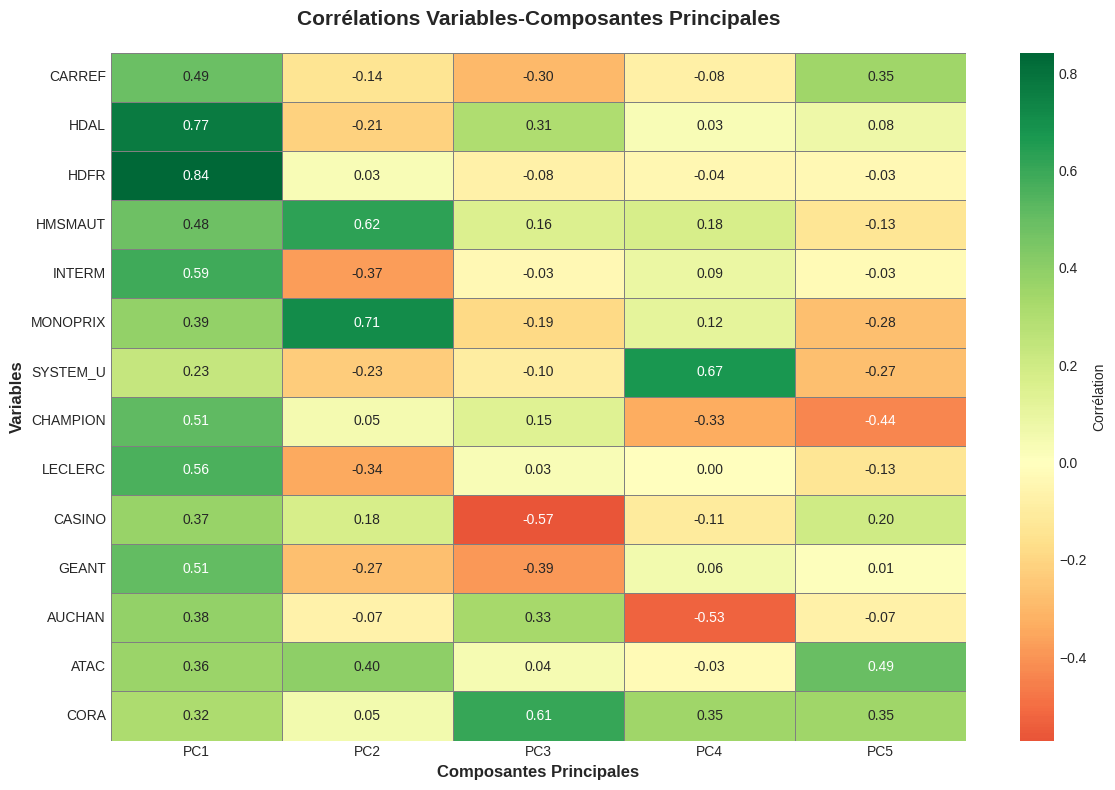

✅ Graphique sauvegardé : correlations_heatmap.png

EXPORT DES RÉSULTATS
✅ Fichiers exportés :
  - output_part1_pca.csv : Données avec scores PCA
  - eigenvalues_analysis.csv : Analyse des valeurs propres
  - pca_correlations.csv : Corrélations variables-composantes
  - pca_contributions.csv : Contributions des variables

✅ PARTIE 1 TERMINÉE AVEC SUCCÈS !

➡️  Passez maintenant à la Partie 2 : K-means Clustering


In [5]:
"""
PARTIE 1 : ANALYSE EN COMPOSANTES PRINCIPALES (ACP)
====================================================
- Chargement et préparation des données
- ACP avec paramétrage du scaling
- Caractérisation des composantes principales
- Interprétation des composantes
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configuration matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# ============================================================================
# 1. CHARGEMENT DES DONNÉES
# ============================================================================

print("=" * 80)
print("PARTIE 1 : ANALYSE EN COMPOSANTES PRINCIPALES (ACP)")
print("=" * 80)

# Chargement
df = pd.read_csv("/content/site_2350.csv", delimiter=";")
print(f"\n✅ Données chargées : {df.shape[0]} observations, {df.shape[1]} variables")
print("\nAperçu des données :")
print(df.head())

# Définition des variables
SG_actifs = df.iloc[:, 3:17]  # Variables actives (colonnes 4 à 17)
SG_illus = df.iloc[:, 1:3]    # Variables illustratives (colonnes 2 à 3)

print(f"\nVariables actives : {list(SG_actifs.columns)}")
print(f"Nombre de variables actives : {SG_actifs.shape[1]}")


# ============================================================================
# 2. CONFIGURATION : PARAMÉTRAGE DU SCALING
# ============================================================================

print("\n" + "=" * 80)
print("CONFIGURATION DE L'ACP")
print("=" * 80)

# ⚙️ PARAMÈTRE PRINCIPAL : STANDARDISATION
SCALE_DATA = True  # True = Avec standardisation, False = Sans standardisation
N_PCA_COMPONENTS = 14

print(f"\n✅ Standardisation : {'OUI (données centrées-réduites)' if SCALE_DATA else 'NON (données brutes)'}")
print(f"✅ Nombre de composantes : {N_PCA_COMPONENTS}")


# ============================================================================
# 3. EXÉCUTION DE L'ACP
# ============================================================================

print("\n" + "=" * 80)
print("EXÉCUTION DE L'ACP")
print("=" * 80)

# Standardisation (si activée)
if SCALE_DATA:
    print("\n🔄 Standardisation des données (moyenne=0, écart-type=1)")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(SG_actifs)
else:
    print("\n📋 Utilisation des données brutes (sans standardisation)")
    X_scaled = SG_actifs.values

# ACP
pca = PCA(n_components=N_PCA_COMPONENTS)
pca_scores = pca.fit_transform(X_scaled)

print(f"\n✅ ACP effectuée avec succès")
print(f"Variance totale expliquée : {pca.explained_variance_ratio_.sum()*100:.2f}%")


# ============================================================================
# 4. ANALYSE DES VALEURS PROPRES
# ============================================================================

print("\n" + "=" * 80)
print("ANALYSE DES VALEURS PROPRES")
print("=" * 80)

# Calcul des valeurs propres
eigenvalues = pca.explained_variance_
n = len(eigenvalues)

# Intervalles de confiance
val_lower = eigenvalues * np.exp(-1.96 * np.sqrt(2.0 / (n - 1)))
val_higher = eigenvalues * np.exp(+1.96 * np.sqrt(2.0 / (n - 1)))

# Variance expliquée
var_explained = pca.explained_variance_ratio_ * 100
var_cumulative = np.cumsum(var_explained)

# Tableau des valeurs propres
eigenvalues_df = pd.DataFrame({
    'Composante': [f'PC{i+1}' for i in range(len(eigenvalues))],
    'Valeur_Propre': eigenvalues,
    'Borne_Inf': val_lower,
    'Borne_Sup': val_higher,
    'Variance_%': var_explained,
    'Variance_Cumul_%': var_cumulative
})

print("\nTableau des valeurs propres :")
print(eigenvalues_df.round(3))

# Critère de Kaiser
kaiser_components = (eigenvalues > 1).sum()
print(f"\nCritère de Kaiser (λ > 1) : {kaiser_components} composantes à retenir")

# Variance expliquée par les principales composantes
print(f"\n✅ PC1 explique {var_explained[0]:.2f}% de la variance")
print(f"✅ PC1-PC2 expliquent {var_cumulative[1]:.2f}% de la variance")
print(f"✅ PC1-PC4 expliquent {var_cumulative[3]:.2f}% de la variance")


# ============================================================================
# 5. VISUALISATIONS : SCREE PLOT
# ============================================================================

print("\n" + "=" * 80)
print("VISUALISATIONS")
print("=" * 80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scree plot des valeurs propres
ax1.plot(range(1, len(eigenvalues) + 1), eigenvalues,
        marker='o', linestyle='-', linewidth=2, markersize=10, color='steelblue')
ax1.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Critère de Kaiser (λ=1)')
ax1.set_xlabel('Numéro de Composante', fontsize=13, fontweight='bold')
ax1.set_ylabel('Valeur Propre', fontsize=13, fontweight='bold')
ax1.set_title('Scree Plot - Valeurs Propres', fontsize=15, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.4)

# Variance expliquée cumulée
ax2.plot(range(1, len(eigenvalues) + 1), var_cumulative,
        marker='s', linestyle='-', linewidth=2, markersize=10, color='green')
ax2.axhline(y=80, color='red', linestyle='--', linewidth=2, label='80% de variance')
ax2.set_xlabel('Numéro de Composante', fontsize=13, fontweight='bold')
ax2.set_ylabel('Variance Expliquée Cumulée (%)', fontsize=13, fontweight='bold')
ax2.set_title('Variance Expliquée Cumulée', fontsize=15, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.4)

plt.tight_layout()
plt.savefig('scree_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphiques sauvegardés : scree_plot.png")


# ============================================================================
# 6. CARACTÉRISATION DES COMPOSANTES PRINCIPALES
# ============================================================================

print("\n" + "=" * 80)
print("CARACTÉRISATION DES COMPOSANTES PRINCIPALES")
print("=" * 80)

variable_names = SG_actifs.columns
N_COMPONENTS_TO_ANALYZE = min(5, N_PCA_COMPONENTS)

# Corrélations entre variables et composantes
if SCALE_DATA:
    # Si données standardisées, les corrélations sont directes
    correlations = pca.components_.T * np.sqrt(pca.explained_variance_)
else:
    # Si données non standardisées, calculer les corrélations
    std_vars = np.std(SG_actifs, axis=0)
    correlations = pca.components_.T * np.sqrt(pca.explained_variance_) / std_vars[:, np.newaxis]

correlations_df = pd.DataFrame(
    correlations[:, :N_COMPONENTS_TO_ANALYZE],
    columns=[f'PC{i+1}' for i in range(N_COMPONENTS_TO_ANALYZE)],
    index=variable_names
)

# Contributions (%)
contributions = (correlations ** 2) * 100
contributions_df = pd.DataFrame(
    contributions[:, :N_COMPONENTS_TO_ANALYZE],
    columns=[f'PC{i+1}' for i in range(N_COMPONENTS_TO_ANALYZE)],
    index=variable_names
)

# Affichage
print("\n" + "-" * 80)
print("CORRÉLATIONS VARIABLES-COMPOSANTES")
print("-" * 80)
print(correlations_df.round(3))

print("\n" + "-" * 80)
print("CONTRIBUTIONS DES VARIABLES AUX COMPOSANTES (%)")
print("-" * 80)
print(contributions_df.round(2))

mean_contribution = 100 / len(variable_names)
print(f"\n💡 Contribution moyenne théorique : {mean_contribution:.2f}%")
print("(Une variable contribue significativement si contribution > moyenne)")


# ============================================================================
# 7. CERCLE DES CORRÉLATIONS
# ============================================================================

print("\n" + "=" * 80)
print("CERCLE DES CORRÉLATIONS")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

for idx, (pc1, pc2) in enumerate([(0, 1), (2, 3)]):
    ax = axes[idx]

    # Cercle
    circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--', linewidth=2)
    ax.add_artist(circle)

    # Axes
    ax.axhline(y=0, color='k', linestyle='-', linewidth=1)
    ax.axvline(x=0, color='k', linestyle='-', linewidth=1)

    # Flèches des variables
    for i, var in enumerate(variable_names):
        x = correlations_df.iloc[i, pc1]
        y = correlations_df.iloc[i, pc2]
        ax.arrow(0, 0, x*0.9, y*0.9, head_width=0.05, head_length=0.05,
                fc='red', ec='red', alpha=0.7, linewidth=1.5)
        ax.text(x*1.15, y*1.15, var, fontsize=9, ha='center', va='center',
               bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', alpha=0.6))

    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlabel(f'PC{pc1+1} ({var_explained[pc1]:.1f}%)', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'PC{pc2+1} ({var_explained[pc2]:.1f}%)', fontsize=12, fontweight='bold')
    ax.set_title(f'Cercle des Corrélations PC{pc1+1}-PC{pc2+1}', fontsize=14, fontweight='bold')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('correlation_circles.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphiques sauvegardés : correlation_circles.png")


# ============================================================================
# 8. INTERPRÉTATION AUTOMATIQUE DES COMPOSANTES
# ============================================================================

print("\n" + "=" * 80)
print("INTERPRÉTATION DES COMPOSANTES PRINCIPALES")
print("=" * 80)

THRESHOLD_CORRELATION = 0.5

for i in range(N_COMPONENTS_TO_ANALYZE):
    pc_name = f'PC{i+1}'
    print(f"\n{'═' * 80}")
    print(f"{pc_name} - Variance expliquée : {var_explained[i]:.2f}%")
    print(f"{'═' * 80}")

    # Variables positivement corrélées
    pos_corr = correlations_df[pc_name][correlations_df[pc_name] > THRESHOLD_CORRELATION].sort_values(ascending=False)
    if len(pos_corr) > 0:
        print(f"\n✅ Variables POSITIVEMENT corrélées (r > {THRESHOLD_CORRELATION}):")
        for var, corr in pos_corr.items():
            contrib = contributions_df.loc[var, pc_name]
            print(f"  • {var:30s} : r = {corr:6.3f}, contribution = {contrib:6.2f}%")

    # Variables négativement corrélées
    neg_corr = correlations_df[pc_name][correlations_df[pc_name] < -THRESHOLD_CORRELATION].sort_values()
    if len(neg_corr) > 0:
        print(f"\n❌ Variables NÉGATIVEMENT corrélées (r < -{THRESHOLD_CORRELATION}):")
        for var, corr in neg_corr.items():
            contrib = contributions_df.loc[var, pc_name]
            print(f"  • {var:30s} : r = {corr:6.3f}, contribution = {contrib:6.2f}%")

    # Variables les plus contributives
    top_contrib = contributions_df[pc_name].sort_values(ascending=False).head(5)
    print(f"\n🏆 Top 5 des variables les plus contributives:")
    for var, contrib in top_contrib.items():
        corr = correlations_df.loc[var, pc_name]
        print(f"  • {var:30s} : contribution = {contrib:6.2f}%, r = {corr:6.3f}")


# ============================================================================
# 9. HEATMAP DES CORRÉLATIONS
# ============================================================================

print("\n" + "=" * 80)
print("HEATMAP DES CORRÉLATIONS")
print("=" * 80)

plt.figure(figsize=(12, 8))
sns.heatmap(correlations_df, annot=True, fmt='.2f', cmap='RdYlGn',
           center=0, cbar_kws={'label': 'Corrélation'},
           linewidths=0.5, linecolor='gray')
plt.title('Corrélations Variables-Composantes Principales', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Composantes Principales', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('correlations_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphique sauvegardé : correlations_heatmap.png")


# ============================================================================
# 10. EXPORT DES RÉSULTATS DE L'ACP
# ============================================================================

print("\n" + "=" * 80)
print("EXPORT DES RÉSULTATS")
print("=" * 80)

# Création du DataFrame avec les scores PCA
pca_scores_df = pd.DataFrame(
    pca_scores,
    columns=[f'PC{i+1}' for i in range(N_PCA_COMPONENTS)]
)

# Combinaison avec les données originales
output_pca = pd.concat([df, pca_scores_df], axis=1)

# Export
output_pca.to_csv("output_part1_pca.csv", index=False)
eigenvalues_df.to_csv("eigenvalues_analysis.csv", index=False)
correlations_df.to_csv("pca_correlations.csv")
contributions_df.to_csv("pca_contributions.csv")

print("✅ Fichiers exportés :")
print("  - output_part1_pca.csv : Données avec scores PCA")
print("  - eigenvalues_analysis.csv : Analyse des valeurs propres")
print("  - pca_correlations.csv : Corrélations variables-composantes")
print("  - pca_contributions.csv : Contributions des variables")

print("\n" + "=" * 80)
print("✅ PARTIE 1 TERMINÉE AVEC SUCCÈS !")
print("=" * 80)
print("\n➡️  Passez maintenant à la Partie 2 : K-means Clustering")

PARTIE 2 : K-MEANS CLUSTERING

✅ Données chargées : 2350 observations, 31 variables
✅ 14 composantes principales récupérées
Variables PCA : ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']... (total : 14)

CONFIGURATION DU K-MEANS

✅ Composantes utilisées : PC1 à PC4
✅ Nombre de clusters K-means : 235
✅ Random state : 1000 (pour reproductibilité)

DÉTERMINATION DU NOMBRE OPTIMAL DE CLUSTERS
⚠️ Warning: N_CLUSTERS_KMEANS (235) is greater than the plotting range limit (50). The plots will only show metrics up to k=49.

Calcul des métriques pour différents nombres de clusters...


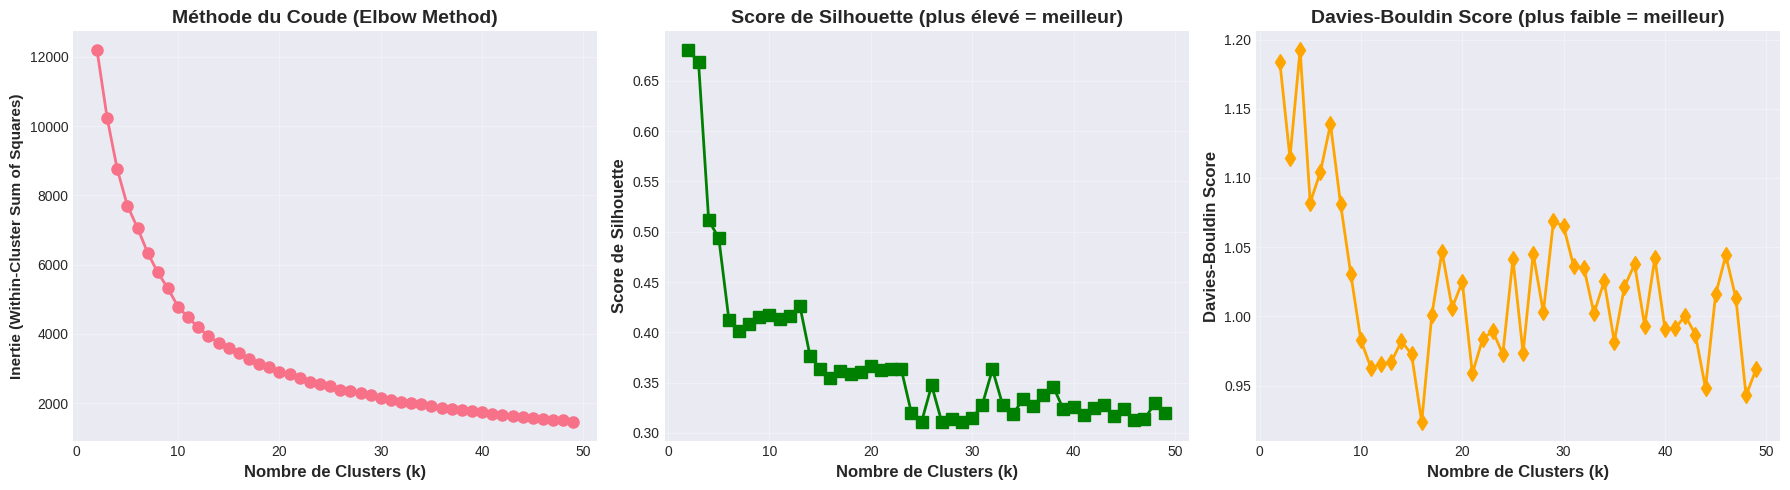


⚠️ N_CLUSTERS_KMEANS (235) est en dehors de la plage de calcul des métriques. Impossible d'afficher les scores pour ce k.

✅ Graphique sauvegardé : kmeans_optimal_k.png

EXÉCUTION DU K-MEANS FINAL

✅ K-means effectué avec succès
Nombre d'itérations : 15
Inertie finale : 272.02

Répartition des observations dans les 235 clusters :
--------------------------------------------------
  Cluster  0 :   51 observations ( 2.17%)
  Cluster  1 :    1 observations ( 0.04%)
  Cluster  2 :    1 observations ( 0.04%)
  Cluster  3 :   20 observations ( 0.85%)
  Cluster  4 :    1 observations ( 0.04%)
  Cluster  5 :    1 observations ( 0.04%)
  Cluster  6 :    3 observations ( 0.13%)
  Cluster  7 :    1 observations ( 0.04%)
  Cluster  8 :    2 observations ( 0.09%)
  Cluster  9 :    5 observations ( 0.21%)
  Cluster 10 :    6 observations ( 0.26%)
  Cluster 11 :    1 observations ( 0.04%)
  Cluster 12 :   26 observations ( 1.11%)
  Cluster 13 :   31 observations ( 1.32%)
  Cluster 14 :    1 observat

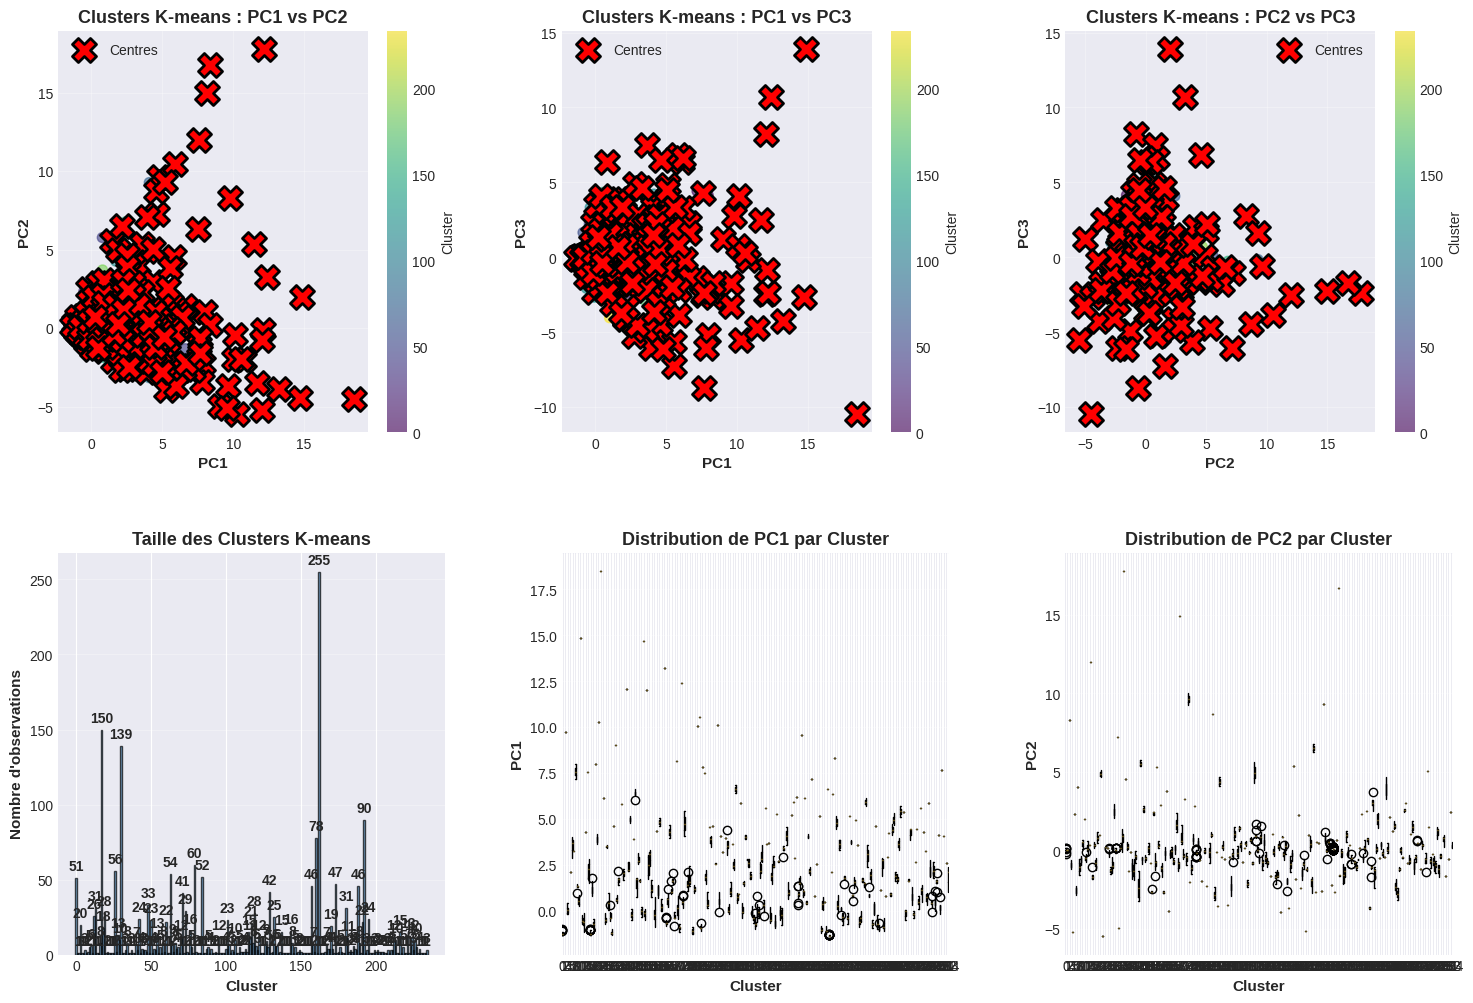

✅ Graphiques sauvegardés : kmeans_visualizations.png

ANALYSE PRÉLIMINAIRE DES CLUSTERS

✅ Moyennes des variables par cluster (aperçu) :
--------------------------------------------------------------------------------
                 CARREF       HDAL       HDFR    HMSMAUT     INTERM
Cluster_KMeans                                                     
0                   0.0      0.000     99.863    237.137    374.529
1               42818.0  13418.000  10792.000   4230.000   8094.000
2                   0.0   3101.000  27847.000  18738.000  16798.000
3                   0.0   1751.350   1580.500    309.650   9832.550
4               75577.0  24173.000  29231.000   4788.000  59999.000
...                 ...        ...        ...        ...        ...
230                 0.0  18707.000  14394.000   2027.000  18262.000
231                 0.0  17612.000  22285.000  11031.000   7779.000
232             37982.0  15159.000  13247.000   7077.000  17421.000
233                 0.0   2694.000

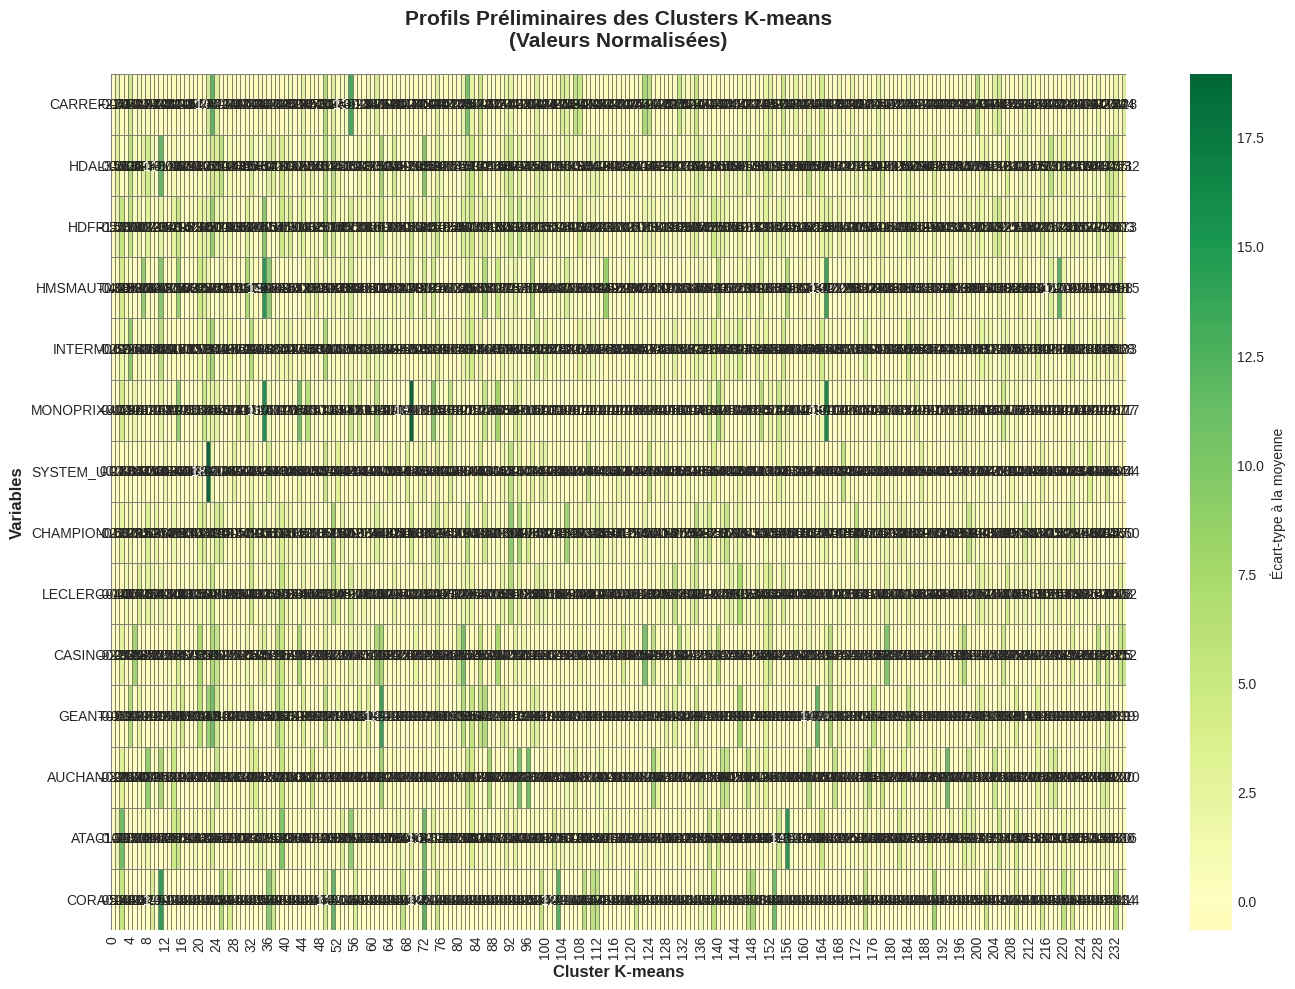

✅ Graphique sauvegardé : kmeans_profiles_heatmap.png

EXPORT DES RÉSULTATS
✅ Fichiers exportés :
  - output_part2_kmeans.csv : Données avec labels K-means
  - kmeans_centers.csv : Centres des clusters K-means
  - kmeans_cluster_profiles.csv : Profils des clusters

✅ PARTIE 2 TERMINÉE AVEC SUCCÈS !

➡️  Passez maintenant à la Partie 3 : Clustering Hiérarchique


In [16]:
# PARTIE 2 : K-MEANS CLUSTERING SUR LES COMPOSANTES PRINCIPALES
# ==============================================================
# - Chargement des résultats de la Partie 1
# - K-means clustering sur les composantes principales
# - Visualisation des clusters
# - Analyse préliminaire des clusters


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Configuration matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# ============================================================================
# 1. CHARGEMENT DES RÉSULTATS DE LA PARTIE 1
# ============================================================================

print("=" * 80)
print("PARTIE 2 : K-MEANS CLUSTERING")
print("=" * 80)

# Chargement des données avec scores PCA
df_pca = pd.read_csv("output_part1_pca.csv")
print(f"\n✅ Données chargées : {df_pca.shape[0]} observations, {df_pca.shape[1]} variables")

# Extraction des variables originales et des scores PCA
SG_actifs = df_pca.iloc[:, 3:17]  # Variables actives originales
pca_columns = [col for col in df_pca.columns if col.startswith('PC')]
pca_scores = df_pca[pca_columns].values

print(f"✅ {len(pca_columns)} composantes principales récupérées")
print(f"Variables PCA : {pca_columns[:5]}... (total : {len(pca_columns)})")


# ============================================================================
# 2. CONFIGURATION DU K-MEANS
# ============================================================================

print("\n" + "=" * 80)
print("CONFIGURATION DU K-MEANS")
print("=" * 80)

# Paramètres
N_PC_FOR_KMEANS = 4  # Nombre de composantes à utiliser
N_CLUSTERS_KMEANS = max(2, round(0.1 * df_pca.shape[0]))  # 10% des observations
RANDOM_STATE = 1000

print(f"\n✅ Composantes utilisées : PC1 à PC{N_PC_FOR_KMEANS}")
print(f"✅ Nombre de clusters K-means : {N_CLUSTERS_KMEANS}")
print(f"✅ Random state : {RANDOM_STATE} (pour reproductibilité)")


# ============================================================================
# 3. DÉTERMINATION DU NOMBRE OPTIMAL DE CLUSTERS
# ============================================================================

print("\n" + "=" * 80)
print("DÉTERMINATION DU NOMBRE OPTIMAL DE CLUSTERS")
print("=" * 80)

# Sélection des composantes pour K-means
X_kmeans = pca_scores[:, :N_PC_FOR_KMEANS]

# NOTE: Evaluating metrics for a very large number of clusters (up to N_CLUSTERS_KMEANS)
# can be time-consuming and may result in plots that are hard to interpret.
# If you intend to test a smaller range, adjust the upper limit of k_range.

# Calcul de l'inertie et du score de silhouette pour différents k
# The range is adjusted to include N_CLUSTERS_KMEANS for metric calculation and plotting.
# It also limits the maximum k to a reasonable number (e.g., 50) to avoid excessive computation
# and unreadable plots, while ensuring N_CLUSTERS_KMEANS is included if it's within that limit.
k_max_for_metrics = min(N_CLUSTERS_KMEANS + 1, 50) # Limit max k to 50 for practical plotting
if N_CLUSTERS_KMEANS > 50:
    print(f"⚠️ Warning: N_CLUSTERS_KMEANS ({N_CLUSTERS_KMEANS}) is greater than the plotting range limit (50). The plots will only show metrics up to k=49.")
k_range = range(2, k_max_for_metrics)

inertias = []
silhouette_scores = []
davies_bouldin_scores = []

print("\nCalcul des métriques pour différents nombres de clusters...")
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_kmeans)

    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_kmeans, labels_temp))
    davies_bouldin_scores.append(davies_bouldin_score(X_kmeans, labels_temp))

# Visualisation des métriques
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Elbow method
axes[0].plot(k_range, inertias, marker='o', linestyle='-', linewidth=2, markersize=8)
if N_CLUSTERS_KMEANS in k_range:
    axes[0].axvline(x=N_CLUSTERS_KMEANS, color='red', linestyle='--', linewidth=2,
                   label=f'k={N_CLUSTERS_KMEANS} (choisi)')
axes[0].set_xlabel('Nombre de Clusters (k)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Inertie (Within-Cluster Sum of Squares)', fontsize=11, fontweight='bold')
axes[0].set_title('Méthode du Coude (Elbow Method)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Silhouette score
axes[1].plot(k_range, silhouette_scores, marker='s', linestyle='-',
            linewidth=2, markersize=8, color='green')
if N_CLUSTERS_KMEANS in k_range:
    axes[1].axvline(x=N_CLUSTERS_KMEANS, color='red', linestyle='--', linewidth=2,
                   label=f'k={N_CLUSTERS_KMEANS} (choisi)')
axes[1].set_xlabel('Nombre de Clusters (k)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Score de Silhouette', fontsize=12, fontweight='bold')
axes[1].set_title('Score de Silhouette (plus élevé = meilleur)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Davies-Bouldin score
axes[2].plot(k_range, davies_bouldin_scores, marker='d', linestyle='-',
            linewidth=2, markersize=8, color='orange')
if N_CLUSTERS_KMEANS in k_range:
    axes[2].axvline(x=N_CLUSTERS_KMEANS, color='red', linestyle='--', linewidth=2,
                   label=f'k={N_CLUSTERS_KMEANS} (choisi)')
axes[2].set_xlabel('Nombre de Clusters (k)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Davies-Bouldin Score', fontsize=12, fontweight='bold')
axes[2].set_title('Davies-Bouldin Score (plus faible = meilleur)', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('kmeans_optimal_k.png', dpi=300, bbox_inches='tight')
plt.show()

# Affichage des scores pour k choisi (only if N_CLUSTERS_KMEANS is within the k_range for metrics)
if N_CLUSTERS_KMEANS in k_range:
    idx_chosen = list(k_range).index(N_CLUSTERS_KMEANS)
    print(f"\n✅ Métriques pour k={N_CLUSTERS_KMEANS} :")
    print(f"  - Inertie : {inertias[idx_chosen]:.2f}")
    print(f"  - Silhouette Score : {silhouette_scores[idx_chosen]:.3f}")
    print(f"  - Davies-Bouldin Score : {davies_bouldin_scores[idx_chosen]:.3f}")
else:
    print(f"\n⚠️ N_CLUSTERS_KMEANS ({N_CLUSTERS_KMEANS}) est en dehors de la plage de calcul des métriques. Impossible d'afficher les scores pour ce k.")

print("\n✅ Graphique sauvegardé : kmeans_optimal_k.png")


# ============================================================================
# 4. EXÉCUTION DU K-MEANS FINAL
# ============================================================================

print("\n" + "=" * 80)
print("EXÉCUTION DU K-MEANS FINAL")
print("=" * 80)

# K-means final
kmeans = KMeans(n_clusters=N_CLUSTERS_KMEANS, random_state=RANDOM_STATE,
               n_init=10, max_iter=300)
kmeans_labels = kmeans.fit_predict(X_kmeans)

print(f"\n✅ K-means effectué avec succès")
print(f"Nombre d'itérations : {kmeans.n_iter_}")
print(f"Inertie finale : {kmeans.inertia_:.2f}")

# Répartition des observations
cluster_sizes = pd.Series(kmeans_labels).value_counts().sort_index()
print(f"\nRépartition des observations dans les {N_CLUSTERS_KMEANS} clusters :")
print("-" * 50)
for cluster, size in cluster_sizes.items():
    pct = (size / len(kmeans_labels)) * 100
    print(f"  Cluster {cluster:2d} : {size:4d} observations ({pct:5.2f}%)")


# ============================================================================
# 5. VISUALISATION DES CLUSTERS K-MEANS
# ============================================================================

print("\n" + "=" * 80)
print("VISUALISATION DES CLUSTERS K-MEANS")
print("=" * 80)

# Graphiques multiples
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. PC1 vs PC2
ax1 = fig.add_subplot(gs[0, 0])
scatter1 = ax1.scatter(pca_scores[:, 0], pca_scores[:, 1],
                      c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='red', marker='X', s=300, edgecolors='black', linewidths=2, label='Centres')
ax1.set_xlabel('PC1', fontsize=11, fontweight='bold')
ax1.set_ylabel('PC2', fontsize=11, fontweight='bold')
ax1.set_title('Clusters K-means : PC1 vs PC2', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# 2. PC1 vs PC3
ax2 = fig.add_subplot(gs[0, 1])
scatter2 = ax2.scatter(pca_scores[:, 0], pca_scores[:, 2],
                      c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
           c='red', marker='X', s=300, edgecolors='black', linewidths=2, label='Centres')
ax2.set_xlabel('PC1', fontsize=11, fontweight='bold')
ax2.set_ylabel('PC3', fontsize=11, fontweight='bold')
ax2.set_title('Clusters K-means : PC1 vs PC3', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='Cluster')

# 3. PC2 vs PC3
ax3 = fig.add_subplot(gs[0, 2])
scatter3 = ax3.scatter(pca_scores[:, 1], pca_scores[:, 2],
                      c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
ax3.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           c='red', marker='X', s=300, edgecolors='black', linewidths=2, label='Centres')
ax3.set_xlabel('PC2', fontsize=11, fontweight='bold')
ax3.set_ylabel('PC3', fontsize=11, fontweight='bold')
ax3.set_title('Clusters K-means : PC2 vs PC3', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=ax3, label='Cluster')

# 4. Distribution des tailles de clusters
ax4 = fig.add_subplot(gs[1, 0])
bars = ax4.bar(cluster_sizes.index, cluster_sizes.values, color='steelblue', alpha=0.7, edgecolor='black')
ax4.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax4.set_ylabel('Nombre d\'observations', fontsize=11, fontweight='bold')
ax4.set_title('Taille des Clusters K-means', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
# Ajouter les valeurs sur les barres
for i, (cluster, size) in enumerate(cluster_sizes.items()):
    ax4.text(i, size + 5, str(size), ha='center', fontweight='bold')

# 5. Boxplot PC1 par cluster
ax5 = fig.add_subplot(gs[1, 1])
data_for_box = [pca_scores[kmeans_labels == i, 0] for i in range(N_CLUSTERS_KMEANS)]
ax5.boxplot(data_for_box, labels=range(N_CLUSTERS_KMEANS))
ax5.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax5.set_ylabel('PC1', fontsize=11, fontweight='bold')
ax5.set_title('Distribution de PC1 par Cluster', fontsize=13, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')

# 6. Boxplot PC2 par cluster
ax6 = fig.add_subplot(gs[1, 2])
data_for_box = [pca_scores[kmeans_labels == i, 1] for i in range(N_CLUSTERS_KMEANS)]
ax6.boxplot(data_for_box, labels=range(N_CLUSTERS_KMEANS))
ax6.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax6.set_ylabel('PC2', fontsize=11, fontweight='bold')
ax6.set_title('Distribution de PC2 par Cluster', fontsize=13, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')

plt.savefig('kmeans_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphiques sauvegardés : kmeans_visualizations.png")


# ============================================================================
# 6. ANALYSE PRÉLIMINAIRE DES CLUSTERS
# ============================================================================

print("\n" + "=" * 80)
print("ANALYSE PRÉLIMINAIRE DES CLUSTERS")
print("=" * 80)

# Calcul des moyennes des variables d'origine par cluster
df_with_clusters = SG_actifs.copy()
df_with_clusters['Cluster_KMeans'] = kmeans_labels

cluster_means = df_with_clusters.groupby('Cluster_KMeans').mean()
global_means = SG_actifs.mean()

print("\n✅ Moyennes des variables par cluster (aperçu) :")
print("-" * 80)
print(cluster_means.iloc[:, :5].round(3))

# Statistiques par cluster sur les composantes principales
pca_stats = pd.DataFrame(X_kmeans, columns=[f'PC{i+1}' for i in range(N_PC_FOR_KMEANS)])
pca_stats['Cluster'] = kmeans_labels

print("\n✅ Moyennes des composantes principales par cluster :")
print("-" * 80)
print(pca_stats.groupby('Cluster').mean().round(3))


# ============================================================================
# 7. HEATMAP DES PROFILS DE CLUSTERS (PRÉLIMINAIRE)
# ============================================================================

print("\n" + "=" * 80)
print("HEATMAP DES PROFILS PRÉLIMINAIRES")
print("=" * 80)

# Normalisation pour la visualisation
cluster_means_norm = (cluster_means - global_means) / SG_actifs.std()

plt.figure(figsize=(14, 10))
sns.heatmap(cluster_means_norm.T, annot=True, fmt='.2f', cmap='RdYlGn',
           center=0, cbar_kws={'label': 'Écart-type à la moyenne'},
           linewidths=0.5, linecolor='gray')
plt.title('Profils Préliminaires des Clusters K-means\n(Valeurs Normalisées)',
         fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Cluster K-means', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('kmeans_profiles_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphique sauvegardé : kmeans_profiles_heatmap.png")


# ============================================================================
# 8. EXPORT DES RÉSULTATS K-MEANS
# ============================================================================

print("\n" + "=" * 80)
print("EXPORT DES RÉSULTATS")
print("=" * 80)

# Ajout des labels K-means aux données
output_kmeans = df_pca.copy()
output_kmeans['Cluster_KMeans'] = kmeans_labels

# Export
output_kmeans.to_csv("output_part2_kmeans.csv", index=False)

# Export des centres de clusters
centers_df = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=[f'PC{i+1}' for i in range(N_PC_FOR_KMEANS)]
)
centers_df.to_csv("kmeans_centers.csv", index=False)

# Export des profils de clusters
cluster_means.to_csv("kmeans_cluster_profiles.csv")

print("✅ Fichiers exportés :")
print("  - output_part2_kmeans.csv : Données avec labels K-means")
print("  - kmeans_centers.csv : Centres des clusters K-means")
print("  - kmeans_cluster_profiles.csv : Profils des clusters")

print("\n" + "=" * 80)
print("✅ PARTIE 2 TERMINÉE AVEC SUCCÈS !")
print("=" * 80)
print("\n➡️  Passez maintenant à la Partie 3 : Clustering Hiérarchique")

PARTIE 3 : CLUSTERING HIÉRARCHIQUE ET CARACTÉRISATION FINALE

✅ Données chargées : 2350 observations, 32 variables
✅ 235 centres K-means récupérés

CLUSTERING HIÉRARCHIQUE (MÉTHODE DE WARD)

✅ Distances calculées entre 235 centres K-means
✅ Clustering hiérarchique effectué (Méthode de Ward)

ANALYSE DE L'INERTIE ET CHOIX DU NOMBRE DE CLUSTERS

Inertie inter-clusters pour les 20 premières partitions :
------------------------------------------------------------
   1 clusters : Inertie =  1006.91
   2 clusters : Inertie =   902.08
   3 clusters : Inertie =   719.51
   4 clusters : Inertie =   376.27
   5 clusters : Inertie =   356.17
   6 clusters : Inertie =   328.54
   7 clusters : Inertie =   260.50
   8 clusters : Inertie =   237.24
   9 clusters : Inertie =   233.76
  10 clusters : Inertie =   209.45
  11 clusters : Inertie =   182.07
  12 clusters : Inertie =   148.97
  13 clusters : Inertie =   130.94
  14 clusters : Inertie =   117.35
  15 clusters : Inertie =   107.40
  16 clust

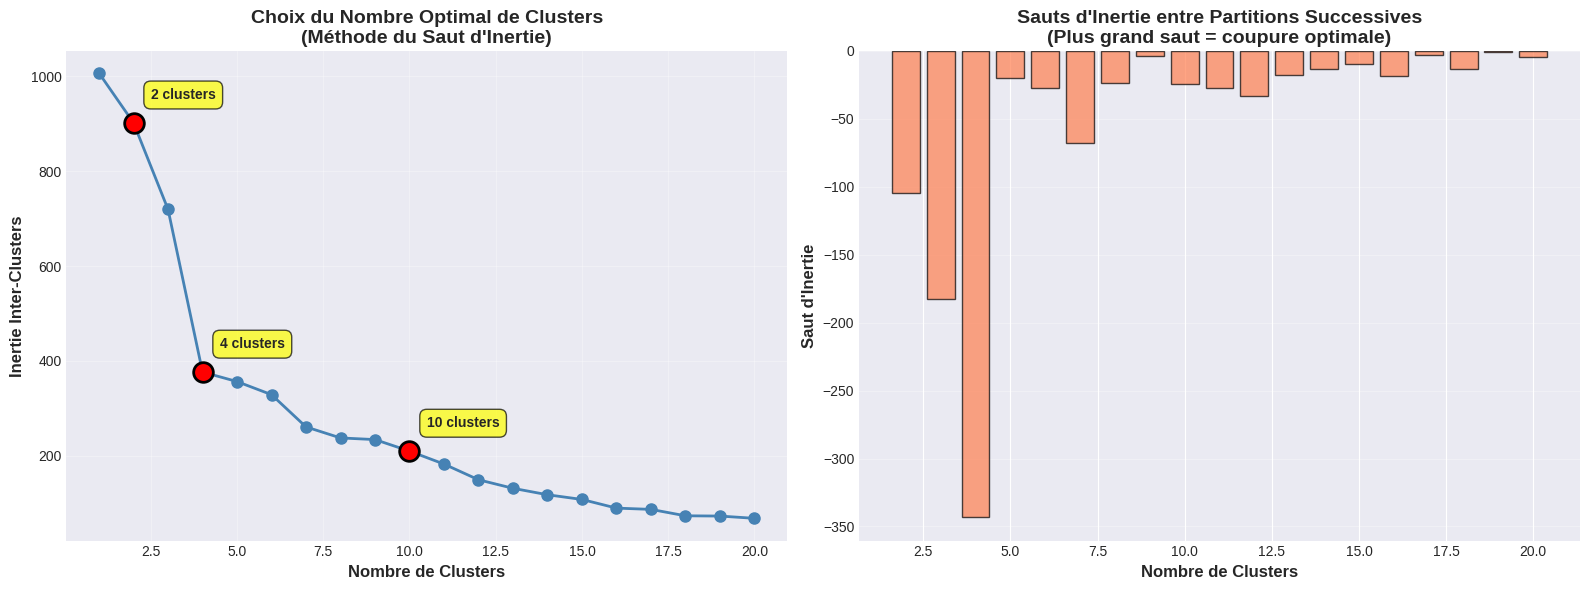


✅ Graphique sauvegardé : hierarchical_inertia_analysis.png

DENDROGRAMME


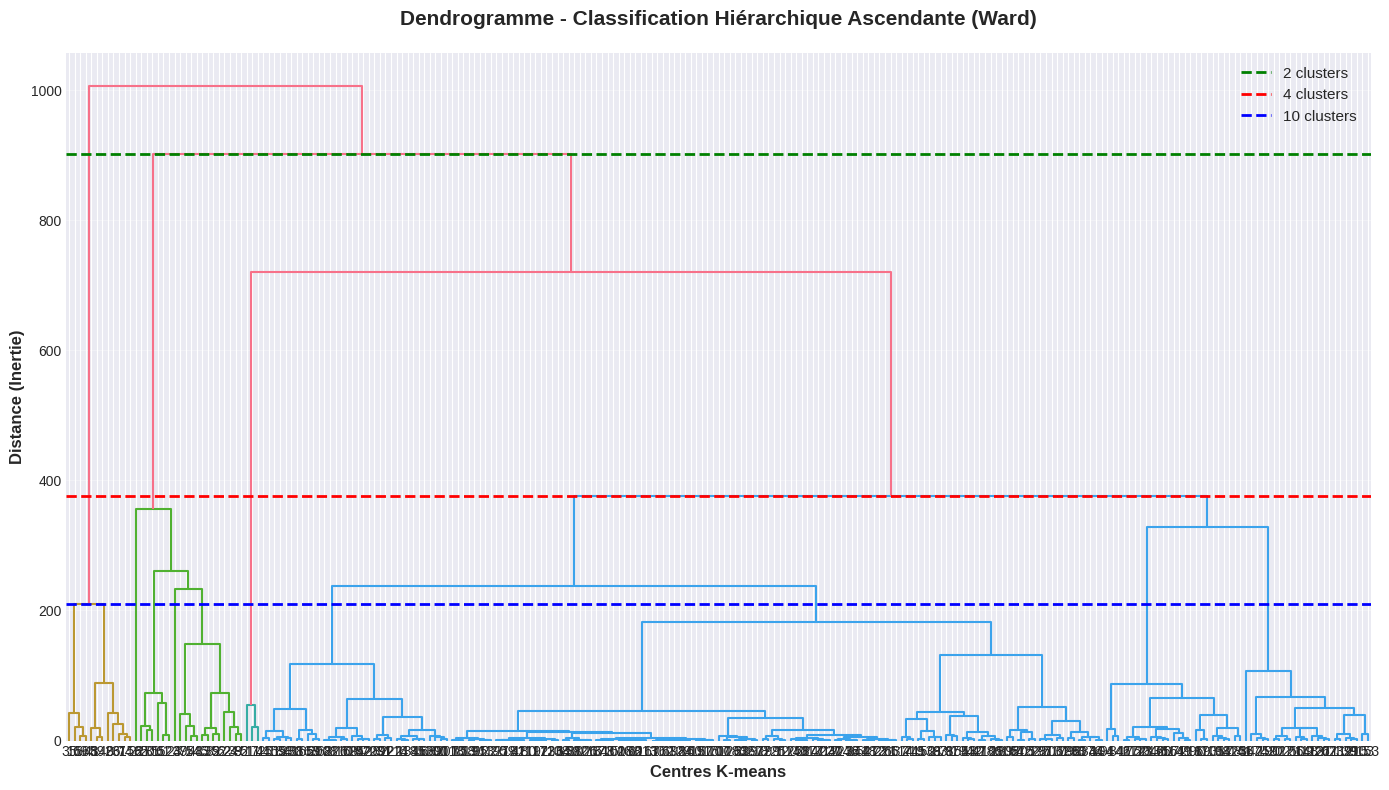

✅ Graphique sauvegardé : dendrogram.png

DÉCOUPAGE EN CLUSTERS FINAUX

✅ Découpage en 10 clusters finaux effectué

Répartition des observations dans les 10 clusters finaux :
------------------------------------------------------------
  Cluster  0 : 2113 observations (89.91%)
  Cluster  1 :   13 observations ( 0.55%)
  Cluster  2 :   12 observations ( 0.51%)
  Cluster  3 :  109 observations ( 4.64%)
  Cluster  4 :   45 observations ( 1.91%)
  Cluster  5 :   47 observations ( 2.00%)
  Cluster  6 :    3 observations ( 0.13%)
  Cluster  7 :    6 observations ( 0.26%)
  Cluster  8 :    1 observations ( 0.04%)
  Cluster  9 :    1 observations ( 0.04%)

✅ Correspondance K-means → Clusters finaux :
------------------------------------------------------------
     Cluster_KMeans  Cluster_Final
0                 0              0
1                 1              0
2                 2              1
3                 3              0
4                 4              2
..              ...         

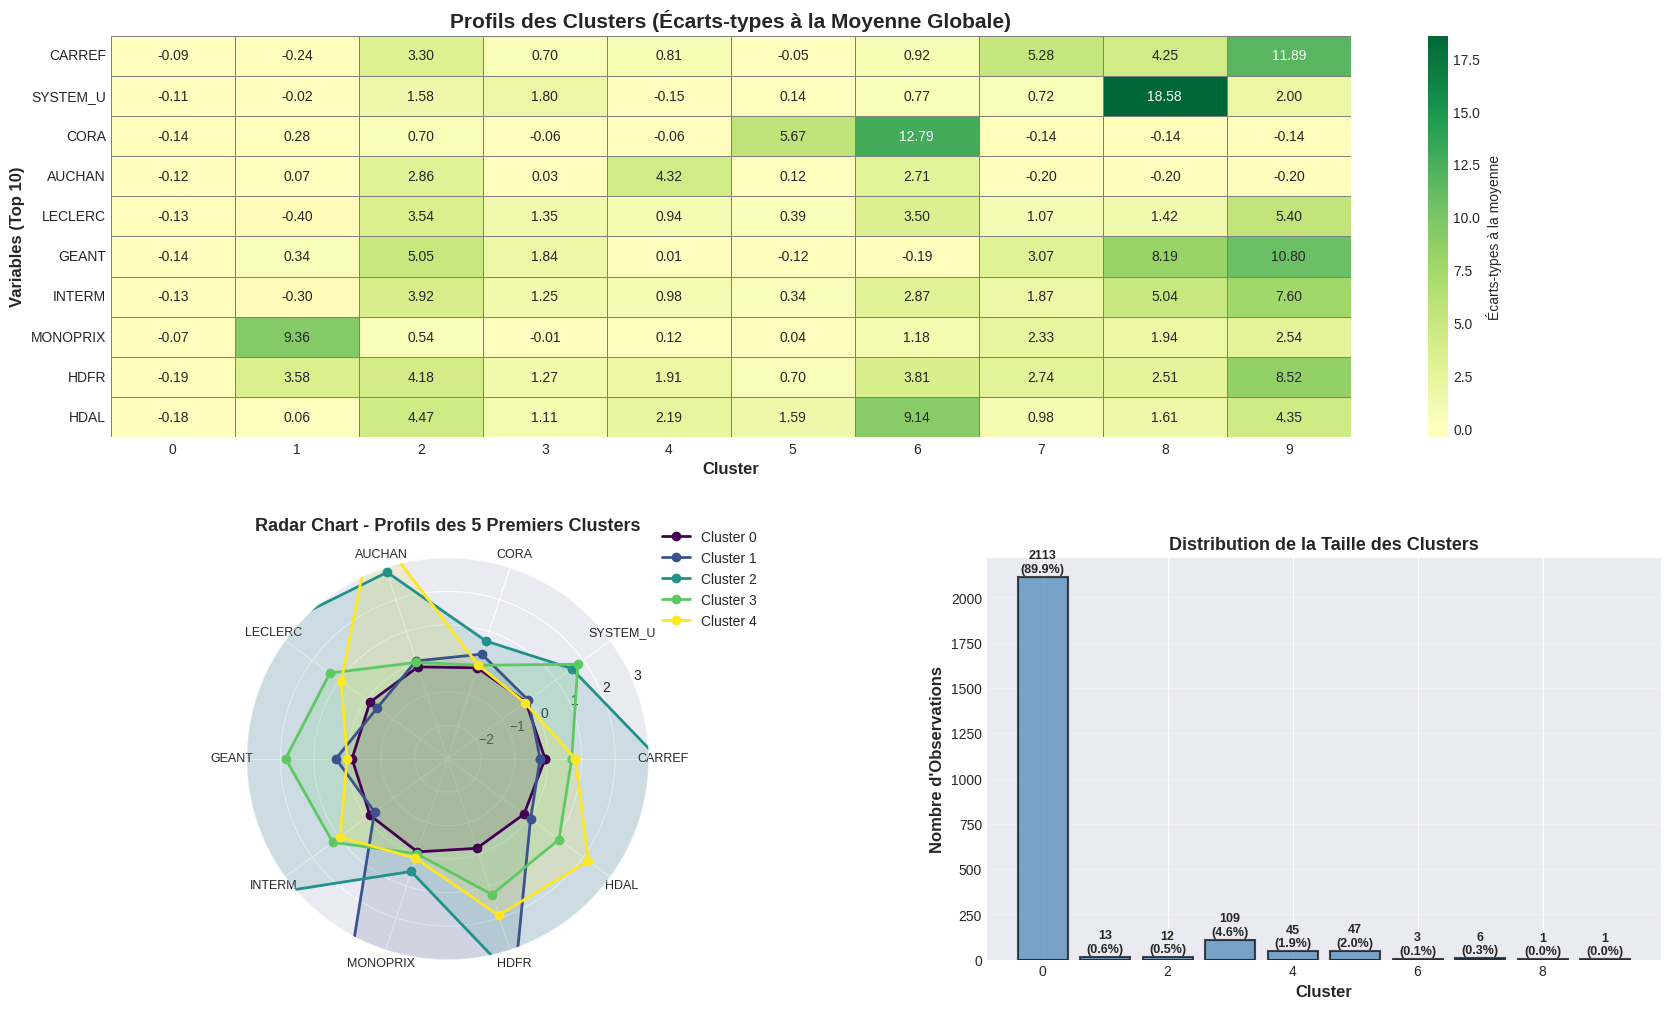


✅ Graphique sauvegardé : cluster_profiles_complete.png

CARACTÉRISTIQUES DISTINCTIVES DES CLUSTERS

════════════════════════════════════════════════════════════════════════════════
CLUSTER 0
════════════════════════════════════════════════════════════════════════════════
Taille : 2113 observations (89.9% du total)

📊 Moyennes des variables (top 5) :
  • INTERM                         : 3322.720 (global: 4093.448, écart: -18.83%)
  • LECLERC                        : 3317.080 (global: 4839.398, écart: -31.46%)
  • CARREF                         : 2314.746 (global: 3772.678, écart: -38.64%)
  • CHAMPION                       : 2199.355 (global: 2743.154, écart: -19.82%)
  • SYSTEM_U                       : 2063.333 (global: 2787.004, écart: -25.97%)

❌ Variables SOUS-REPRÉSENTÉES (<-15% vs moyenne globale) :
  • CORA                           :   0.000 (-100.00%)
  • GEANT                          : 300.980 (-72.39%)
  • AUCHAN                         : 1082.075 (-59.26%)
  • MONOPRIX   

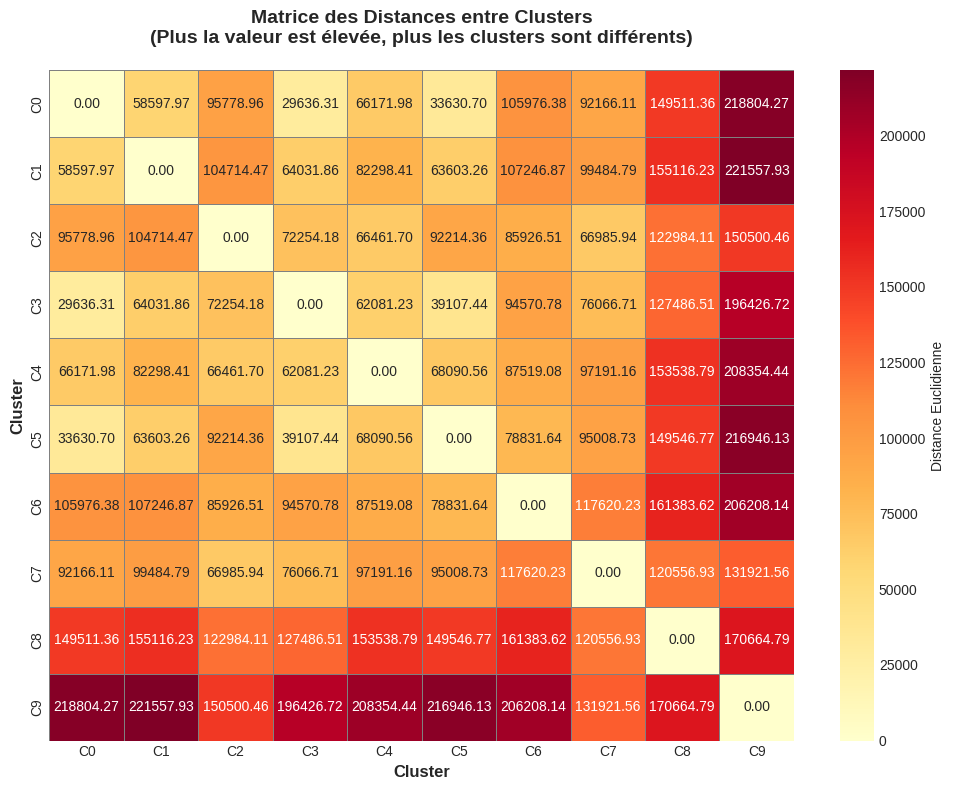


✅ Graphique sauvegardé : cluster_distance_matrix.png

EXPORT DES RÉSULTATS FINAUX
✅ Fichiers exportés :
  - output_part3_final_results.csv : Données complètes avec clusters finaux
  - cluster_profiles_final.csv : Profils moyens des clusters
  - cluster_deviations_percent.csv : Écarts en % à la moyenne globale
  - cluster_deviations_std.csv : Écarts en nombre d'écarts-types
  - cluster_statistics.csv : Statistiques des clusters
  - cluster_distances.csv : Matrice des distances entre clusters
  - analysis_summary.csv : Résumé de l'analyse

RÉSUMÉ DE L'ANALYSE COMPLÈTE

📊 STATISTIQUES GLOBALES
────────────────────────────────────────────────────────────────────────────────
  • Nombre total d'observations : 2350
  • Nombre de variables actives : 14
  • Nombre de clusters K-means : 235
  • Nombre de clusters finaux : 10

📈 RÉPARTITION DES CLUSTERS FINAUX
────────────────────────────────────────────────────────────────────────────────

  Cluster  0 : ████████████████████████████████████████

In [17]:
"""
PARTIE 3 : CLUSTERING HIÉRARCHIQUE ET CARACTÉRISATION COMPLÈTE
==============================================================
- Clustering hiérarchique sur les centres K-means
- Choix du nombre optimal de clusters finaux
- Caractérisation détaillée des clusters avec les variables d'origine
- Interprétation et profils des clusters finaux
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import ward, dendrogram, cut_tree, fcluster
import warnings
warnings.filterwarnings('ignore')

# Configuration matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# ============================================================================
# 1. CHARGEMENT DES RÉSULTATS DE LA PARTIE 2
# ============================================================================

print("=" * 80)
print("PARTIE 3 : CLUSTERING HIÉRARCHIQUE ET CARACTÉRISATION FINALE")
print("=" * 80)

# Chargement des données avec labels K-means
df_kmeans = pd.read_csv("output_part2_kmeans.csv")
print(f"\n✅ Données chargées : {df_kmeans.shape[0]} observations, {df_kmeans.shape[1]} variables")

# Chargement des centres K-means
kmeans_centers = pd.read_csv("kmeans_centers.csv").values
print(f"✅ {kmeans_centers.shape[0]} centres K-means récupérés")

# Extraction des variables
SG_actifs = df_kmeans.iloc[:, 3:17]  # Variables actives originales
kmeans_labels = df_kmeans['Cluster_KMeans'].values


# ============================================================================
# 2. CLUSTERING HIÉRARCHIQUE SUR LES CENTRES K-MEANS
# ============================================================================

print("\n" + "=" * 80)
print("CLUSTERING HIÉRARCHIQUE (MÉTHODE DE WARD)")
print("=" * 80)

# Calcul des distances entre centres K-means
distances = pdist(kmeans_centers, metric='euclidean') ** 2
print(f"\n✅ Distances calculées entre {len(kmeans_centers)} centres K-means")

# Clustering hiérarchique avec méthode de Ward
linkage_matrix = ward(distances)
print(f"✅ Clustering hiérarchique effectué (Méthode de Ward)")


# ============================================================================
# 3. ANALYSE DE L'INERTIE ET CHOIX DU NOMBRE DE CLUSTERS
# ============================================================================

print("\n" + "=" * 80)
print("ANALYSE DE L'INERTIE ET CHOIX DU NOMBRE DE CLUSTERS")
print("=" * 80)

# Tri de l'inertie
inertie = np.sort(linkage_matrix[:, 2])[::-1]

# Affichage des inerties pour différents nombres de classes
n_clusters_to_show = min(20, len(inertie))
print(f"\nInertie inter-clusters pour les {n_clusters_to_show} premières partitions :")
print("-" * 60)
for i in range(n_clusters_to_show):
    n_clusters = i + 1
    print(f"  {n_clusters:2d} clusters : Inertie = {inertie[i]:8.2f}")

# Graphique d'inertie
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Courbe d'inertie
ax1.plot(range(1, n_clusters_to_show + 1), inertie[:n_clusters_to_show],
        marker='o', linestyle='-', linewidth=2, markersize=8, color='steelblue')
# Marquer les points intéressants (2, 4, 10 clusters)
interesting_k = [2, 4, 10]
for k in interesting_k:
    if k <= n_clusters_to_show:
        ax1.scatter([k], [inertie[k-1]], s=200, c='red', marker='o',
                   edgecolors='black', linewidths=2, zorder=5)
        ax1.annotate(f'{k} clusters', xy=(k, inertie[k-1]),
                    xytext=(k+0.5, inertie[k-1]+inertie[0]*0.05),
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

ax1.set_xlabel('Nombre de Clusters', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inertie Inter-Clusters', fontsize=12, fontweight='bold')
ax1.set_title('Choix du Nombre Optimal de Clusters\n(Méthode du Saut d\'Inertie)',
             fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Différence d'inertie (saut)
if len(inertie) > 1:
    inertie_diff = np.diff(inertie[:n_clusters_to_show])
    ax2.bar(range(2, n_clusters_to_show + 1), inertie_diff,
           color='coral', alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Nombre de Clusters', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Saut d\'Inertie', fontsize=12, fontweight='bold')
    ax2.set_title('Sauts d\'Inertie entre Partitions Successives\n(Plus grand saut = coupure optimale)',
                 fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('hierarchical_inertia_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé : hierarchical_inertia_analysis.png")


# ============================================================================
# 4. DENDROGRAMME
# ============================================================================

print("\n" + "=" * 80)
print("DENDROGRAMME")
print("=" * 80)

# Dendrogramme avec lignes de coupure
plt.figure(figsize=(14, 8))
dendrogram(linkage_matrix, leaf_font_size=10, leaf_rotation=0)

# Lignes de coupure pour 2, 4 et 10 classes
if len(inertie) >= 10:
    plt.axhline(y=inertie[1], color='green', linestyle='--', linewidth=2,
               label='2 clusters')
    plt.axhline(y=inertie[3], color='red', linestyle='--', linewidth=2,
               label='4 clusters')
    plt.axhline(y=inertie[9], color='blue', linestyle='--', linewidth=2,
               label='10 clusters')

plt.title('Dendrogramme - Classification Hiérarchique Ascendante (Ward)',
         fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Centres K-means', fontsize=12, fontweight='bold')
plt.ylabel('Distance (Inertie)', fontsize=12, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphique sauvegardé : dendrogram.png")


# ============================================================================
# 5. DÉCOUPAGE EN CLUSTERS FINAUX
# ============================================================================

print("\n" + "=" * 80)
print("DÉCOUPAGE EN CLUSTERS FINAUX")
print("=" * 80)

# Choix du nombre de clusters (vous pouvez modifier ce paramètre)
N_FINAL_CLUSTERS = 10

# Découpage
cutree_groups = cut_tree(linkage_matrix, n_clusters=[N_FINAL_CLUSTERS])
hierarchical_labels_kmeans = cutree_groups.flatten()

# Mapping vers les observations originales
hierarchical_labels = np.array([hierarchical_labels_kmeans[label] for label in kmeans_labels])

print(f"\n✅ Découpage en {N_FINAL_CLUSTERS} clusters finaux effectué")

# Répartition des observations
cluster_final_sizes = pd.Series(hierarchical_labels).value_counts().sort_index()
print(f"\nRépartition des observations dans les {N_FINAL_CLUSTERS} clusters finaux :")
print("-" * 60)
for cluster, size in cluster_final_sizes.items():
    pct = (size / len(hierarchical_labels)) * 100
    print(f"  Cluster {cluster:2d} : {size:4d} observations ({pct:5.2f}%)")

# Correspondance entre K-means et clusters finaux
print("\n✅ Correspondance K-means → Clusters finaux :")
print("-" * 60)
df_mapping = pd.DataFrame({
    'Cluster_KMeans': np.arange(len(kmeans_centers)),
    'Cluster_Final': hierarchical_labels_kmeans
})
print(df_mapping)


# ============================================================================
# 6. CARACTÉRISATION DÉTAILLÉE DES CLUSTERS AVEC VARIABLES D'ORIGINE
# ============================================================================

print("\n" + "=" * 80)
print("CARACTÉRISATION DÉTAILLÉE DES CLUSTERS")
print("=" * 80)

# Ajout des labels finaux aux données
df_with_clusters = SG_actifs.copy()
df_with_clusters['Cluster_Final'] = hierarchical_labels

# Calcul des moyennes par cluster
cluster_profiles = df_with_clusters.groupby('Cluster_Final').mean()

# Moyennes globales
global_means = SG_actifs.mean()
global_std = SG_actifs.std()

# Écart à la moyenne globale (en %)
cluster_deviations_pct = ((cluster_profiles - global_means) / global_means * 100)

# Écart en nombre d'écarts-types
cluster_deviations_std = (cluster_profiles - global_means) / global_std

print("\n" + "-" * 80)
print("STATISTIQUES GÉNÉRALES DES CLUSTERS")
print("-" * 80)
cluster_stats = pd.DataFrame({
    'Taille': cluster_final_sizes,
    'Pourcentage_%': (cluster_final_sizes / len(hierarchical_labels) * 100).round(2)
})
print(cluster_stats)

print("\n" + "-" * 80)
print("PROFILS DES CLUSTERS - MOYENNES PAR VARIABLE")
print("-" * 80)
print(cluster_profiles.round(3))

print("\n" + "-" * 80)
print("ÉCART À LA MOYENNE GLOBALE (%)")
print("-" * 80)
print(cluster_deviations_pct.round(2))


# ============================================================================
# 7. VISUALISATIONS DES PROFILS DE CLUSTERS
# ============================================================================

print("\n" + "=" * 80)
print("VISUALISATIONS DES PROFILS")
print("=" * 80)

# Sélection des variables les plus discriminantes
cluster_vars = cluster_profiles.var(axis=0).sort_values(ascending=False)
n_top_vars = min(10, len(cluster_vars))
selected_vars = cluster_vars.head(n_top_vars).index

print(f"\n✅ Variables les plus discriminantes (variance maximale entre clusters) :")
print("-" * 60)
for i, (var, variance) in enumerate(cluster_vars.head(n_top_vars).items(), 1):
    print(f"  {i:2d}. {var:30s} : variance = {variance:.4f}")

# Figure avec plusieurs visualisations
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# 1. Heatmap des profils normalisés
ax1 = fig.add_subplot(gs[0, :])
profiles_norm = cluster_deviations_std[selected_vars]
sns.heatmap(profiles_norm.T, annot=True, fmt='.2f', cmap='RdYlGn',
           center=0, cbar_kws={'label': 'Écarts-types à la moyenne'},
           linewidths=0.5, linecolor='gray', ax=ax1)
ax1.set_title('Profils des Clusters (Écarts-types à la Moyenne Globale)',
             fontsize=15, fontweight='bold')
ax1.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax1.set_ylabel('Variables (Top 10)', fontsize=12, fontweight='bold')

# 2. Radar chart (pour les 5 premiers clusters)
ax2 = fig.add_subplot(gs[1, 0], projection='polar')
angles = np.linspace(0, 2 * np.pi, len(selected_vars), endpoint=False).tolist()
angles += angles[:1]

n_clusters_to_plot = min(5, N_FINAL_CLUSTERS)
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters_to_plot))

for i, cluster in enumerate(range(n_clusters_to_plot)):
    values = profiles_norm.loc[cluster, selected_vars].tolist()
    values += values[:1]
    ax2.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}', color=colors[i])
    ax2.fill(angles, values, alpha=0.15, color=colors[i])

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(selected_vars, size=9)
ax2.set_ylim(-3, 3)
ax2.set_title(f'Radar Chart - Profils des {n_clusters_to_plot} Premiers Clusters',
             fontsize=13, fontweight='bold', pad=20)
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
ax2.grid(True)

# 3. Distribution de la taille des clusters
ax3 = fig.add_subplot(gs[1, 1])
bars = ax3.bar(cluster_final_sizes.index, cluster_final_sizes.values,
              color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax3.set_ylabel('Nombre d\'Observations', fontsize=12, fontweight='bold')
ax3.set_title('Distribution de la Taille des Clusters', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')
# Ajouter les valeurs sur les barres
for i, (cluster, size) in enumerate(cluster_final_sizes.items()):
    pct = (size / len(hierarchical_labels)) * 100
    ax3.text(cluster, size + 10, f'{size}\n({pct:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.savefig('cluster_profiles_complete.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé : cluster_profiles_complete.png")


# ============================================================================
# 8. IDENTIFICATION DES CARACTÉRISTIQUES DISTINCTIVES DES CLUSTERS
# ============================================================================

print("\n" + "=" * 80)
print("CARACTÉRISTIQUES DISTINCTIVES DES CLUSTERS")
print("=" * 80)

THRESHOLD_DEVIATION = 15  # Seuil en % pour considérer une variable comme distinctive

for cluster in sorted(cluster_profiles.index):
    print(f"\n{'═' * 80}")
    print(f"CLUSTER {cluster}")
    print(f"{'═' * 80}")
    print(f"Taille : {cluster_stats.loc[cluster, 'Taille']} observations "
          f"({cluster_stats.loc[cluster, 'Pourcentage_%']:.1f}% du total)")

    # Caractéristiques du cluster (moyennes)
    print(f"\n📊 Moyennes des variables (top 5) :")
    top_means = cluster_profiles.loc[cluster].sort_values(ascending=False).head(5)
    for var, val in top_means.items():
        global_val = global_means[var]
        dev = cluster_deviations_pct.loc[cluster, var]
        print(f"  • {var:30s} : {val:7.3f} (global: {global_val:7.3f}, écart: {dev:+6.2f}%)")

    # Variables sur-représentées
    over_represented = cluster_deviations_pct.loc[cluster][
        cluster_deviations_pct.loc[cluster] > THRESHOLD_DEVIATION
    ].sort_values(ascending=False)

    if len(over_represented) > 0:
        print(f"\n✅ Variables SUR-REPRÉSENTÉES (>{THRESHOLD_DEVIATION}% vs moyenne globale) :")
        for var, dev in over_represented.items():
            val = cluster_profiles.loc[cluster, var]
            print(f"  • {var:30s} : {val:7.3f} (+{dev:6.2f}%)")

    # Variables sous-représentées
    under_represented = cluster_deviations_pct.loc[cluster][
        cluster_deviations_pct.loc[cluster] < -THRESHOLD_DEVIATION
    ].sort_values()

    if len(under_represented) > 0:
        print(f"\n❌ Variables SOUS-REPRÉSENTÉES (<-{THRESHOLD_DEVIATION}% vs moyenne globale) :")
        for var, dev in under_represented.items():
            val = cluster_profiles.loc[cluster, var]
            print(f"  • {var:30s} : {val:7.3f} ({dev:6.2f}%)")

    # Top 3 des variables les plus caractéristiques (en valeur absolue)
    top_characteristics = cluster_deviations_pct.loc[cluster].abs().sort_values(ascending=False).head(3)
    print(f"\n🏆 Top 3 des variables les PLUS CARACTÉRISTIQUES :")
    for var in top_characteristics.index:
        val = cluster_profiles.loc[cluster, var]
        dev = cluster_deviations_pct.loc[cluster, var]
        sign = "+" if dev > 0 else ""
        print(f"  • {var:30s} : {val:7.3f} ({sign}{dev:6.2f}%)")


# ============================================================================
# 9. COMPARAISON ENTRE CLUSTERS
# ============================================================================

print("\n" + "=" * 80)
print("COMPARAISON ENTRE CLUSTERS")
print("=" * 80)

# Variables avec les plus grandes différences entre clusters
print("\n✅ Variables avec les plus grandes variations entre clusters :")
print("-" * 60)
top_discriminant = cluster_vars.head(10)
for i, (var, variance) in enumerate(top_discriminant.items(), 1):
    min_val = cluster_profiles[var].min()
    max_val = cluster_profiles[var].max()
    amplitude = max_val - min_val
    print(f"  {i:2d}. {var:30s}")
    print(f"      Variance: {variance:.4f}, Amplitude: {amplitude:.3f} (min: {min_val:.3f}, max: {max_val:.3f})")

# Matrice de distances entre clusters
cluster_centers_final = cluster_profiles.values
from scipy.spatial.distance import pdist, squareform
dist_matrix = squareform(pdist(cluster_centers_final, metric='euclidean'))
dist_df = pd.DataFrame(dist_matrix,
                       index=[f'C{i}' for i in range(N_FINAL_CLUSTERS)],
                       columns=[f'C{i}' for i in range(N_FINAL_CLUSTERS)])

plt.figure(figsize=(10, 8))
sns.heatmap(dist_df, annot=True, fmt='.2f', cmap='YlOrRd',
           cbar_kws={'label': 'Distance Euclidienne'},
           linewidths=0.5, linecolor='gray')
plt.title('Matrice des Distances entre Clusters\n(Plus la valeur est élevée, plus les clusters sont différents)',
         fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Cluster', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('cluster_distance_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé : cluster_distance_matrix.png")


# ============================================================================
# 10. EXPORT DES RÉSULTATS FINAUX
# ============================================================================

print("\n" + "=" * 80)
print("EXPORT DES RÉSULTATS FINAUX")
print("=" * 80)

# DataFrame final avec tous les résultats
output_final = df_kmeans.copy()
output_final['Cluster_Final'] = hierarchical_labels

# Export principal
output_final.to_csv("output_part3_final_results.csv", index=False)

# Export des profils de clusters
cluster_profiles.to_csv("cluster_profiles_final.csv")
cluster_deviations_pct.to_csv("cluster_deviations_percent.csv")
cluster_deviations_std.to_csv("cluster_deviations_std.csv")

# Export des statistiques
cluster_stats.to_csv("cluster_statistics.csv")

# Export de la matrice de distances
dist_df.to_csv("cluster_distances.csv")

# Résumé de l'analyse
summary = {
    'Analyse': 'Clustering Hybride (K-means + Hiérarchique)',
    'Nombre_observations': len(hierarchical_labels),
    'Nombre_variables_actives': SG_actifs.shape[1],
    'Nombre_clusters_kmeans': len(np.unique(kmeans_labels)),
    'Nombre_clusters_finaux': N_FINAL_CLUSTERS,
    'Date_analyse': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}
summary_df = pd.DataFrame([summary])
summary_df.to_csv("analysis_summary.csv", index=False)

print("✅ Fichiers exportés :")
print("  - output_part3_final_results.csv : Données complètes avec clusters finaux")
print("  - cluster_profiles_final.csv : Profils moyens des clusters")
print("  - cluster_deviations_percent.csv : Écarts en % à la moyenne globale")
print("  - cluster_deviations_std.csv : Écarts en nombre d'écarts-types")
print("  - cluster_statistics.csv : Statistiques des clusters")
print("  - cluster_distances.csv : Matrice des distances entre clusters")
print("  - analysis_summary.csv : Résumé de l'analyse")


# ============================================================================
# 11. RÉSUMÉ FINAL
# ============================================================================

print("\n" + "=" * 80)
print("RÉSUMÉ DE L'ANALYSE COMPLÈTE")
print("=" * 80)

print(f"""
📊 STATISTIQUES GLOBALES
{'─' * 80}
  • Nombre total d'observations : {len(hierarchical_labels)}
  • Nombre de variables actives : {SG_actifs.shape[1]}
  • Nombre de clusters K-means : {len(np.unique(kmeans_labels))}
  • Nombre de clusters finaux : {N_FINAL_CLUSTERS}

📈 RÉPARTITION DES CLUSTERS FINAUX
{'─' * 80}
""")

for cluster, size in cluster_final_sizes.items():
    pct = (size / len(hierarchical_labels)) * 100
    bar = '█' * int(pct / 2)
    print(f"  Cluster {cluster:2d} : {bar} {size:4d} obs ({pct:5.2f}%)")

print(f"""
🎯 VARIABLES LES PLUS DISCRIMINANTES
{'─' * 80}
""")
for i, (var, variance) in enumerate(cluster_vars.head(5).items(), 1):
    print(f"  {i}. {var} (variance = {variance:.4f})")

print(f"""
✅ FICHIERS GÉNÉRÉS
{'─' * 80}
  • Données : output_part3_final_results.csv
  • Profils : cluster_profiles_final.csv
  • Graphiques : *.png (7 fichiers)
  • Analyses : cluster_*.csv (5 fichiers)

""")

print("=" * 80)
print("✅ ANALYSE COMPLÈTE TERMINÉE AVEC SUCCÈS !")
print("=" * 80)
print("\n🎉 Vous disposez maintenant d'une caractérisation complète de vos clusters !")
print("📧 Tous les résultats sont sauvegardés et prêts pour analyse et rapports.\n")